In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
df = pd.read_csv(r'C:\Users\dell7\Downloads\archive\Loan_default.csv')
     

In [4]:
print("Data types & missing values")
print(df.info())


Data types & missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-n

In [5]:
print("DESCRIPTIVE STATS OF Income COLUMN")
print(f'mean: {df["Income"].mean()}')
print(f'median: {df["Income"].median()}')
print(f'standard deviation: {df["Income"].std()}')
print(f'minimum: {df["Income"].min()}')
print(f'maximum: {df["Income"].max()}')
print(f'range: {df["Income"].max() - df["Income"].min()}')
print(f'variance: {df["Income"].var()}')
print(f'skewness: {df["Income"].skew()}')

DESCRIPTIVE STATS OF Income COLUMN
mean: 82499.30459727351
median: 82466.0
standard deviation: 38963.01372937784
minimum: 15000
maximum: 149999
range: 134999
variance: 1518116438.875686
skewness: -0.00038051328464016167


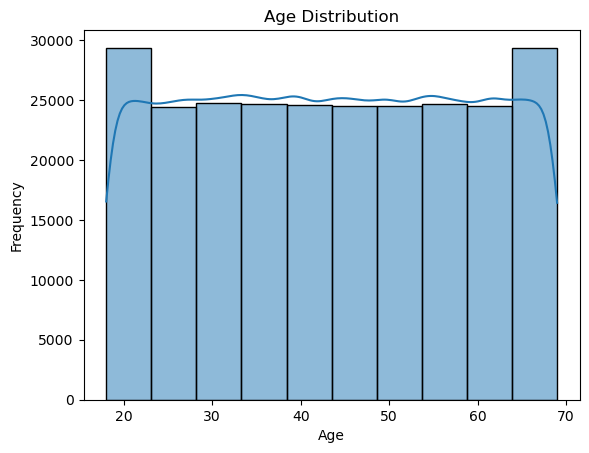

In [7]:
sns.histplot(df['Age'], bins=10,kde=True,fill=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

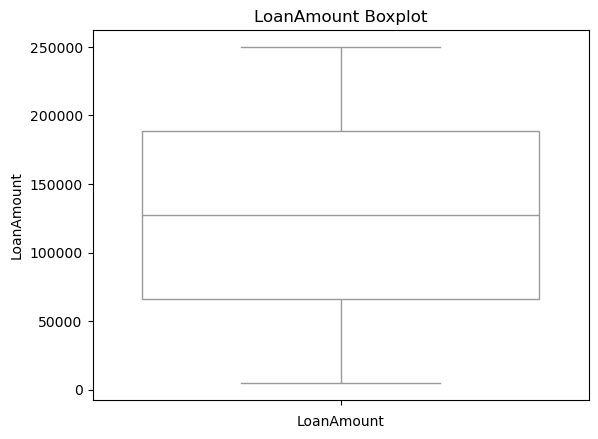

In [10]:
sns.boxplot(df['LoanAmount'],color='white')
plt.xlabel('LoanAmount')
plt.ylabel('LoanAmount')
plt.title('LoanAmount Boxplot')
plt.show()

<Axes: xlabel='EmploymentType', ylabel='Default'>

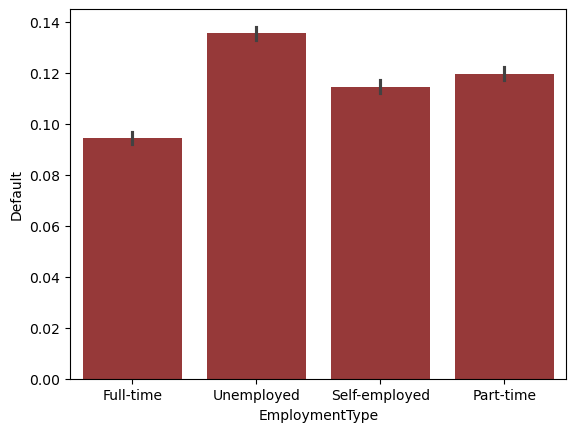

In [12]:
sns.barplot(df,x='EmploymentType',y='Default',color='brown')

In [13]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols
     

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

In [14]:
print("OUTLIER COUNT IN EACH NUMERIC COLUMN")
outliers = {}

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
  outliers[col] = outlier_count

outliers
     

OUTLIER COUNT IN EACH NUMERIC COLUMN


{'Age': 0,
 'Income': 0,
 'LoanAmount': 0,
 'CreditScore': 0,
 'MonthsEmployed': 0,
 'NumCreditLines': 0,
 'InterestRate': 0,
 'LoanTerm': 0,
 'DTIRatio': 0,
 'Default': 29653}

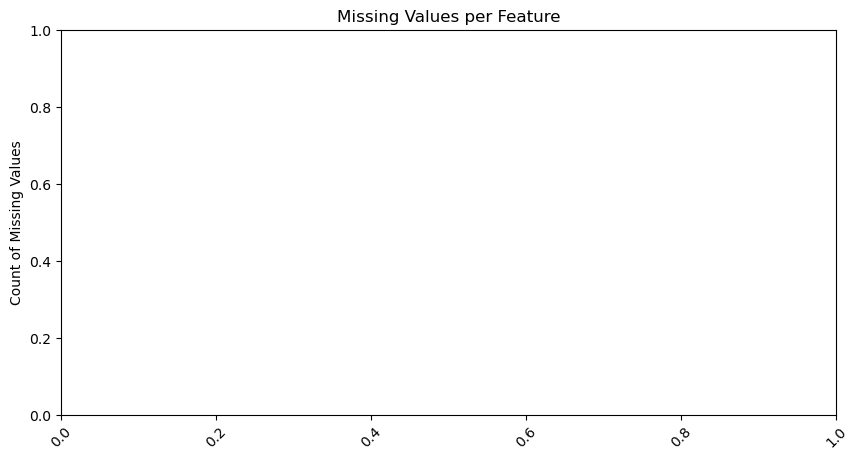

In [15]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.title("Missing Values per Feature")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

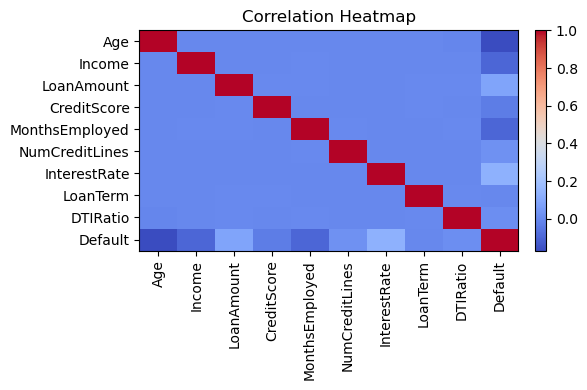

In [22]:
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    plt.figure(figsize=(6,4))
    im = plt.imshow(corr, aspect='auto', cmap="coolwarm")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

In [24]:
outlier_summary = []
for col in numeric_cols:
    s = df[col].dropna()
    if s.empty: 
        continue
    Q1, Q3 = s.quantile(0.25), s.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    count = ((s < lower) | (s > upper)).sum()
    outlier_summary.append((col, int(count), round(count/len(df),3)))

outlier_df = pd.DataFrame(outlier_summary, columns=["feature","outlier_count","outlier_ratio"])
print("\n📌 Outlier Analysis")
display(outlier_df.sort_values("outlier_ratio", ascending=False).head(20))



📌 Outlier Analysis


,feature,outlier_count,outlier_ratio
9,Default,29653,0.116
0,Age,0,0.000
1,Income,0,0.000
2,LoanAmount,0,0.000
4,MonthsEmployed,0,0.000
3,CreditScore,0,0.000
5,NumCreditLines,0,0.000
6,InterestRate,0,0.000
7,LoanTerm,0,0.000
8,DTIRatio,0,0.000


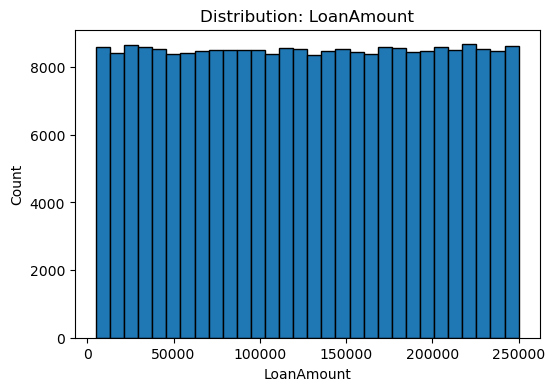

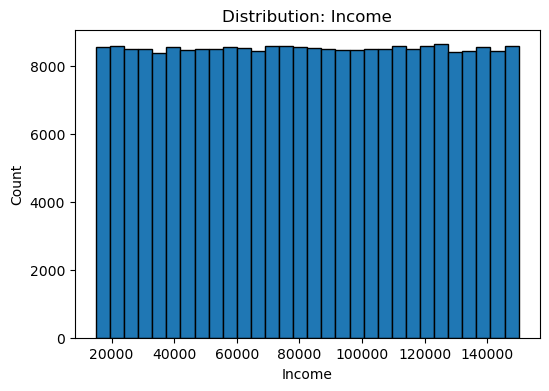

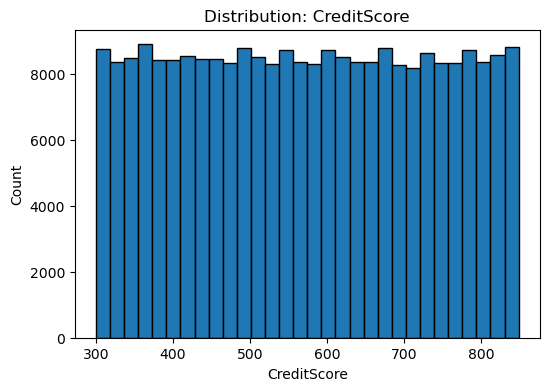

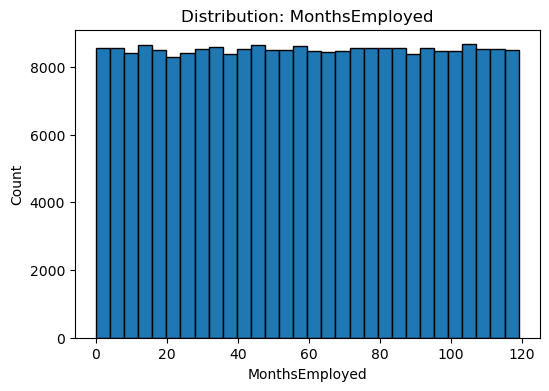

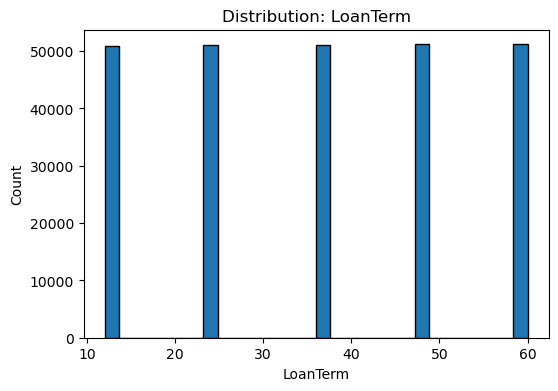

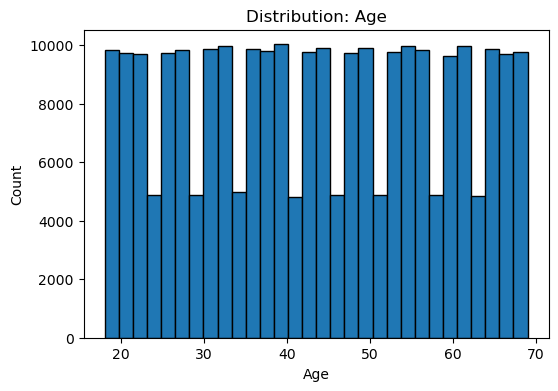

In [26]:
variances = df[numeric_cols].var(numeric_only=True).sort_values(ascending=False)
key_features = variances.index[:min(6, len(variances))].tolist()
for col in key_features:
    plt.figure(figsize=(6,4))
    df[col].dropna().plot(kind="hist", bins=30, edgecolor="black")
    plt.title(f"Distribution: {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

In [28]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

summary_numeric = df[numeric_cols].describe().T
missing = df.isna().mean().sort_values(ascending=False).rename("missing_ratio")

print("\n Summary Statistics (Numeric)")
display(summary_numeric)

print("\n Missing Value Ratios (Top 20)")
display(missing.head(20))


 Summary Statistics (Numeric)


,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0



 Missing Value Ratios (Top 20)


LoanID            0.0
Age               0.0
Income            0.0
LoanAmount        0.0
CreditScore       0.0
MonthsEmployed    0.0
NumCreditLines    0.0
InterestRate      0.0
LoanTerm          0.0
DTIRatio          0.0
Education         0.0
EmploymentType    0.0
MaritalStatus     0.0
HasMortgage       0.0
HasDependents     0.0
LoanPurpose       0.0
HasCoSigner       0.0
Default           0.0
Name: missing_ratio, dtype: float64